# Analysis of Biodiversity in Four Parks
## Author: Parker

## Objective:

Make an recommendation to conservationists to conserve the endangered species

## Importing Python Libraries and Process the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt

In [2]:
spec = pd.read_csv('species_info.csv')
obs = pd.read_csv('observations.csv')

In [3]:
spec.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [4]:
spec.info()

#conservation_status has a lot of missing data which can be inferred as being not conserved.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [5]:
obs.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [6]:
obs['park_name'] = pd.Series(obs['park_name'], dtype="string")
obs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  string
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(1), string(1)
memory usage: 546.1+ KB


In [7]:
#check values in conservation_status

print(spec.conservation_status.nunique())
spec.conservation_status.unique()

4


array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [8]:
#Fill in null values with string, 'None'

spec.conservation_status.fillna('None', inplace=True)

In [9]:
print(spec.info())
print(spec.scientific_name.nunique())
spec[spec.scientific_name.duplicated(keep=False)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  5824 non-null   object
dtypes: object(4)
memory usage: 182.1+ KB
None
5541


,category,scientific_name,common_names,conservation_status
4,Mammal,Cervus elaphus,Wapiti Or Elk,None
5,Mammal,Odocoileus virginianus,White-Tailed Deer,None
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",None
8,Mammal,Canis lupus,Gray Wolf,Endangered
10,Mammal,Urocyon cinereoargenteus,"Common Gray Fox, Gray Fox",None
...,...,...,...,...
5619,Vascular Plant,Panicum rigidulum var. rigidulum,"Redtop Panicgrass, Redtop Panicum",None
5638,Vascular Plant,Setaria pumila,"Cattail Grass, Yellow Bristle Grass, Yellow Br...",None
5640,Vascular Plant,Vulpia bromoides,"Brome Fescue, Brome Six-Weeks Grass, Desert Fe...",None
5643,Vascular Plant,Vulpia myuros,"Foxtail Fescue, Rattail Fescue, Rat-Tail Fescu...",None


In [10]:
duplicates = spec.duplicated()
duplicates.unique()

# no duplicates in species data for complete rows

array([False])

In [11]:
spec[spec.scientific_name.duplicated(keep=False)]

,category,scientific_name,common_names,conservation_status
4,Mammal,Cervus elaphus,Wapiti Or Elk,None
5,Mammal,Odocoileus virginianus,White-Tailed Deer,None
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",None
8,Mammal,Canis lupus,Gray Wolf,Endangered
10,Mammal,Urocyon cinereoargenteus,"Common Gray Fox, Gray Fox",None
...,...,...,...,...
5619,Vascular Plant,Panicum rigidulum var. rigidulum,"Redtop Panicgrass, Redtop Panicum",None
5638,Vascular Plant,Setaria pumila,"Cattail Grass, Yellow Bristle Grass, Yellow Br...",None
5640,Vascular Plant,Vulpia bromoides,"Brome Fescue, Brome Six-Weeks Grass, Desert Fe...",None
5643,Vascular Plant,Vulpia myuros,"Foxtail Fescue, Rattail Fescue, Rat-Tail Fescu...",None


In [12]:
spec[spec.scientific_name == 'Cervus elaphus']
# There are duplicates in scientific_name due to different common names being applied to same scientific name.



,category,scientific_name,common_names,conservation_status
4,Mammal,Cervus elaphus,Wapiti Or Elk,None
3017,Mammal,Cervus elaphus,Rocky Mountain Elk,None


In [13]:
# Checking for if there are duplicates in scientific_name due to difference in conservation_status
spec[spec.scientific_name == 'Canis lupus']

#There are duplicates in scientific_name due to difference in conservation_status
# Proposed solutions to drop earliest rows to assume latest information.

,category,scientific_name,common_names,conservation_status
8,Mammal,Canis lupus,Gray Wolf,Endangered
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered


In [14]:
# count of Not 'None' in duplicated scientific names for conservation status

spec_dup = spec[spec.scientific_name.duplicated(keep=False)]
len(spec_dup[spec_dup.conservation_status != 'None'])

23

In [15]:
# Dropping earliest entries for duplicated scientific names

spec.drop_duplicates(subset=['scientific_name'], inplace=True, keep='last')
spec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5541 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5541 non-null   object
 1   scientific_name      5541 non-null   object
 2   common_names         5541 non-null   object
 3   conservation_status  5541 non-null   object
dtypes: object(4)
memory usage: 216.4+ KB


In [16]:
spec.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,None
1,Mammal,Bos bison,"American Bison, Bison",None
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",None
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",None
7,Mammal,Canis latrans,Coyote,Species of Concern


In [17]:
print(obs[obs.duplicated(keep= False)])
print()
print(len(obs[obs.duplicated(keep= False)]))
print()
print(obs.scientific_name.nunique())
print()
print(obs.park_name.nunique())
# observations data have 30 duplicates
# But, there is only 5541 unique values in scientific_name out of 23296 rows. Examining more closely with park_names.
# There are 4 parks which could be assumed that same species are spotted in all parks. 
# Dropping Duplicates as there is no concerns to drop them also its will only drop 15 rows which will not mess up data.

              scientific_name                            park_name  \
365            Plantago major  Great Smoky Mountains National Park   
513             Arctium minus               Yosemite National Park   
627        Spilogale putorius            Yellowstone National Park   
1020     Eleocharis palustris  Great Smoky Mountains National Park   
1032      Hesperis matronalis                  Bryce National Park   
1454   Echinochloa crus-galli  Great Smoky Mountains National Park   
1635    Streptopelia decaocto            Yellowstone National Park   
4178     Monotropa hypopithys  Great Smoky Mountains National Park   
4527   Botrychium virginianum            Yellowstone National Park   
7219        Prunella vulgaris  Great Smoky Mountains National Park   
7263   Echinochloa crus-galli  Great Smoky Mountains National Park   
8710    Streptopelia decaocto            Yellowstone National Park   
10038          Plantago major  Great Smoky Mountains National Park   
10674           Arct

In [18]:
# drop duplicates in observations data

obs.drop_duplicates(inplace=True)
obs.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23281 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23281 non-null  object
 1   park_name        23281 non-null  string
 2   observations     23281 non-null  int64 
dtypes: int64(1), object(1), string(1)
memory usage: 727.5+ KB


In [19]:
# Aggergate observations data to be joinable with species data

# Groupby by adding observations

obs_sum = obs.groupby('scientific_name').observations.sum()

#Groupby by concating strings in park_name
obs_parks = obs.groupby(['scientific_name'], as_index=False).agg({'park_name': ','.join})

#Joining both aggerated grouped data

obs_agg = pd.merge(obs_parks, obs_sum, on='scientific_name', how='inner')
obs_agg

,scientific_name,park_name,observations
0,Abies bifolia,"Bryce National Park,Yellowstone National Park,...",532
1,Abies concolor,"Great Smoky Mountains National Park,Bryce Nati...",630
2,Abies fraseri,"Bryce National Park,Great Smoky Mountains Nati...",518
3,Abietinella abietina,"Yosemite National Park,Great Smoky Mountains N...",592
4,Abronia ammophila,"Yosemite National Park,Great Smoky Mountains N...",523
...,...,...,...
5536,Zonotrichia leucophrys gambelii,"Bryce National Park,Yellowstone National Park,...",560
5537,Zonotrichia leucophrys oriantha,"Great Smoky Mountains National Park,Yellowston...",558
5538,Zonotrichia querula,"Bryce National Park,Yosemite National Park,Gre...",616
5539,Zygodon viridissimus,"Great Smoky Mountains National Park,Yellowston...",600


In [20]:
# Joining aggerated observations and species data

data = pd.merge(spec, obs_agg, on='scientific_name', how='inner')
data

,category,scientific_name,common_names,conservation_status,park_name,observations
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,None,"Bryce National Park,Yellowstone National Park,...",615
1,Mammal,Bos bison,"American Bison, Bison",None,"Yosemite National Park,Yellowstone National Pa...",542
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",None,"Bryce National Park,Yosemite National Park,Yel...",514
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",None,"Yosemite National Park,Great Smoky Mountains N...",542
4,Mammal,Canis latrans,Coyote,Species of Concern,"Bryce National Park,Yellowstone National Park,...",458
...,...,...,...,...,...,...
5536,Vascular Plant,Solanum parishii,Parish's Nightshade,None,"Bryce National Park,Great Smoky Mountains Nati...",574
5537,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",None,"Great Smoky Mountains National Park,Yellowston...",575
5538,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",None,"Yosemite National Park,Great Smoky Mountains N...",583
5539,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",None,"Bryce National Park,Great Smoky Mountains Nati...",562


Now data look clean and tidy ready to be analyzed

## Exploring Data and Analysis

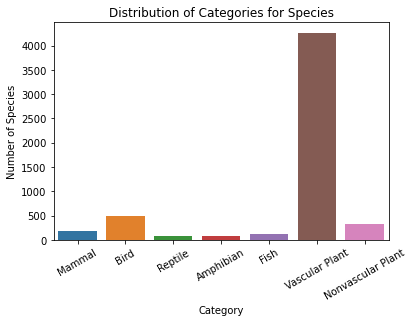

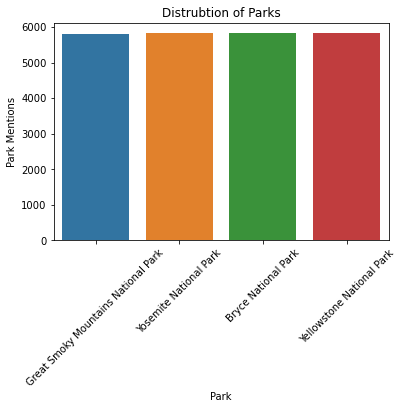

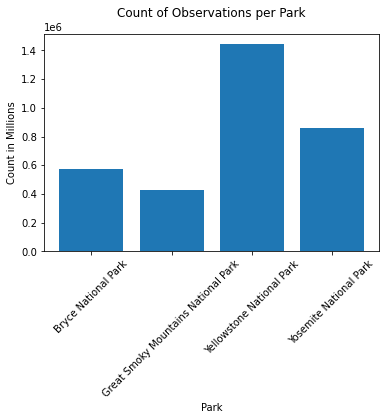

<Figure size 432x288 with 0 Axes>

In [21]:
# Distribution of categories in data

sns.countplot(data=data, x= data.category)
plt.xticks(rotation=30)
plt.title('Distribution of Categories for Species')
plt.xlabel('Category')
plt.ylabel('Number of Species')
plt.show()
plt.clf()

#The bar chart shows that the data is mostly vascular plants.

#Distrubtion of park names in data
sns.countplot(data=obs, x="park_name") 
labels=["Great Smoky Mountains National Park", "Yosemite National Park", "Bryce National Park", "Yellowstone National Park"]
plt.title('Distrubtion of Parks')
plt.xticks(rotation=45)
plt.xlabel('Park')
plt.ylabel('Park Mentions')
plt.show()
plt.clf()
#bar chart shows that the data is evenly distrubted for all park names

# Determing which park has highest number of species

sum_parks = obs.groupby(obs.park_name).observations.sum().reset_index()
sum_parks

plt.bar(data=sum_parks, x=sum_parks.park_name, height=sum_parks.observations)
plt.xticks(rotation=45)
plt.title('Count of Observations per Park', y=1.05)
plt.xlabel('Park')
plt.ylabel('Count in Millions')
plt.show()
plt.clf()

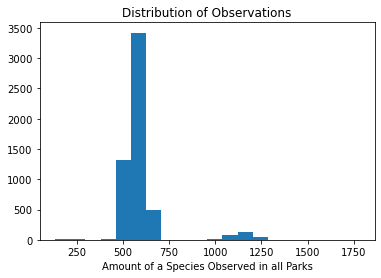

Mean
597.8034650785057
Median
573.0


<Figure size 432x288 with 0 Axes>

In [22]:
# Distribution of observations in data

plt.hist(data.observations, bins=20)
plt.title('Distribution of Observations')
plt.xlabel('Amount of a Species Observed in all Parks')
plt.show()
plt.clf()
print('Mean')
print(data.observations.mean())
print('Median')
print(data.observations.median())

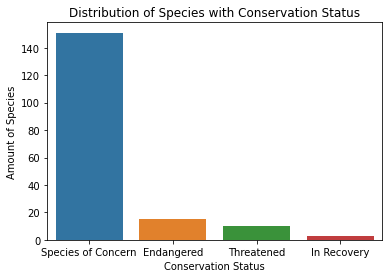

Number of Conserved Species
179


<Figure size 432x288 with 0 Axes>

In [23]:
# Distribution of conservation status
conser = data[data.conservation_status != 'None']
# data without conservation status being none
sns.countplot(data = conser, x= conser.conservation_status)
plt.title('Distribution of Species with Conservation Status')
plt.xlabel('Conservation Status')
plt.ylabel('Amount of Species')
plt.show()
plt.clf()
print("Number of Conserved Species")
print(len(conser))

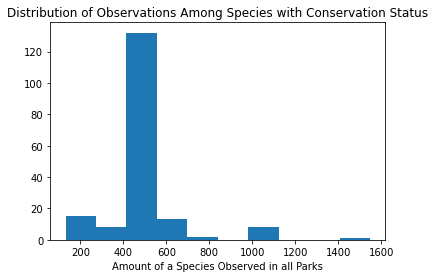

Mean
503.3966480446927
Median
508.0


<Figure size 432x288 with 0 Axes>

In [24]:
# Distribution of observations for conserved species

plt.hist(conser.observations)
plt.title('Distribution of Observations Among Species with Conservation Status')
plt.xlabel('Amount of a Species Observed in all Parks')
plt.show()
plt.clf()

print('Mean')
print(conser.observations.mean())
print('Median')
print(conser.observations.median())

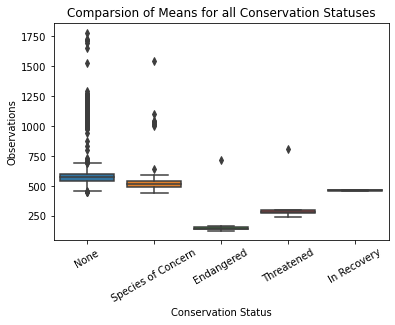

Means of Observations for Conservation Statuses
conservation_status
Endangered            186.533333
In Recovery           464.000000
None                  600.955054
Species of Concern    546.880795
Threatened            333.900000
Name: observations, dtype: float64


<Figure size 432x288 with 0 Axes>

In [25]:
#Compare means of observations for every conservation status

sns.boxplot(data = data, x=data.conservation_status, y=data.observations)
plt.title('Comparsion of Means for all Conservation Statuses')
plt.xlabel('Conservation Status')
plt.ylabel('Observations')
plt.xticks(rotation=30)
plt.show()
plt.clf()

print('Means of Observations for Conservation Statuses')
print(data.groupby(data.conservation_status).observations.mean())

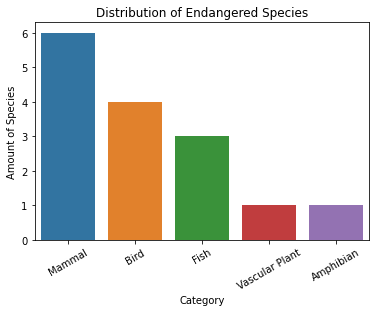

,category,scientific_name,common_names,conservation_status,park_name,observations
5,Mammal,Canis rufus,Red Wolf,Endangered,"Bryce National Park,Yosemite National Park,Gre...",137
20,Mammal,Myotis grisescens,Gray Myotis,Endangered,"Bryce National Park,Yellowstone National Park,...",160
24,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,"Yosemite National Park,Great Smoky Mountains N...",145
52,Mammal,Glaucomys sabrinus coloratus,"Carolina Northern Flying Squirrel, Northern Fl...",Endangered,"Bryce National Park,Great Smoky Mountains Nati...",153
144,Bird,Grus americana,Whooping Crane,Endangered,"Great Smoky Mountains National Park,Yellowston...",131
241,Bird,Vermivora bachmanii,"Bachman's Warbler, Bachman's Wood Warbler",Endangered,"Bryce National Park,Yosemite National Park,Yel...",141
303,Bird,Picoides borealis,Red-Cockaded Woodpecker,Endangered,"Yosemite National Park,Great Smoky Mountains N...",146
497,Fish,Etheostoma percnurum,Duskytail Darter,Endangered,"Yellowstone National Park,Great Smoky Mountain...",166
525,Fish,Noturus baileyi,Smoky Madtom,Endangered,"Great Smoky Mountains National Park,Yellowston...",143
2257,Vascular Plant,Geum radiatum,"Mountain Avens, Spreading Avens",Endangered,"Great Smoky Mountains National Park,Yellowston...",162


<Figure size 432x288 with 0 Axes>

In [26]:
#Distribution of endangered species based on category

endang = data[data.conservation_status == 'Endangered']
#data for endangered species

sns.countplot(data = endang, x=endang.category)
plt.title('Distribution of Endangered Species')
plt.xlabel('Category')
plt.ylabel('Amount of Species')
plt.xticks(rotation=30)
plt.show()
plt.clf()

endang

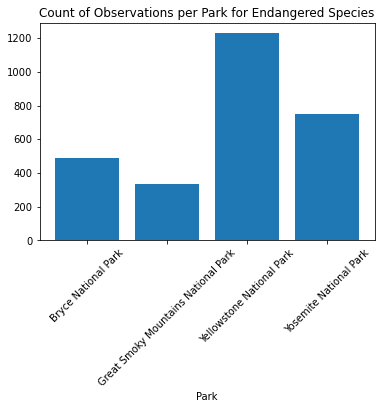

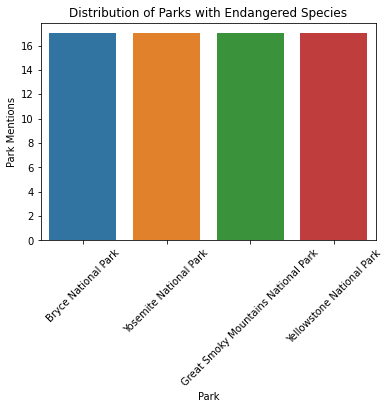

<Figure size 432x288 with 0 Axes>

In [27]:
#Determing which park has lowest observations for all endangered species

endang_parks = pd.DataFrame()
for name in endang.scientific_name:
    df = obs[obs.scientific_name == name]
    endang_parks = pd.concat([endang_parks, df])

sum_endang_parks = endang_parks.groupby(endang_parks.park_name).observations.sum().reset_index()
sum_endang_parks

plt.bar(data=sum_endang_parks, x=sum_endang_parks.park_name, height=sum_endang_parks.observations)
plt.title('Count of Observations per Park for Endangered Species')
plt.xlabel('Park')
plt.xticks(rotation=45)
plt.show()
plt.clf()

#Distribution of parks with endangered species
sns.countplot(data=endang_parks, x=endang_parks.park_name)
plt.title('Distribution of Parks with Endangered Species')
plt.xlabel('Park')
plt.ylabel('Park Mentions')
plt.xticks(rotation=45)
plt.show()
plt.clf()


In [28]:
#top 20 species that spotted the most for all parks

top_species = data.sort_values(by='observations', ascending=False)
top20_species = top_species.head(20).reset_index(drop=True)

#top 5 per category

top_mammals = top_species[top_species.category == 'Mammal']
top_v_plants = top_species[top_species.category == 'Vascular Plant']
top_nv_plants = top_species[top_species.category == 'Nonvascular Plant']
top_fish = top_species[top_species.category == 'Fish']
top_birds = top_species[top_species.category == 'Bird']
top_amp = top_species[top_species.category == 'Amphibian']

top5_mammals = top_mammals.head(5).reset_index(drop=True)
top5_v_plants = top_v_plants.head(5).reset_index(drop=True)
top5_nv_plants = top_nv_plants.head(5).reset_index(drop=True)
top5_fish = top_fish.head(5).reset_index(drop=True)
top5_birds = top_birds.head(5).reset_index(drop=True)
top5_amp = top_amp.head(5).reset_index(drop=True)

print(top5_mammals, top5_v_plants, top5_nv_plants, top5_fish, top5_birds, top5_amp)

#It could be recommended to control those species to decrease the impact on conserved species. It will require knowledge of
#the ecosystem to track predators and preys. Imported datasets does not show any indiciators of predators or preys.

  category    scientific_name         common_names conservation_status  \
0   Mammal  Castor canadensis               Beaver                None   
1   Mammal      Puma concolor        Mountain Lion                None   
2   Mammal      Procyon lotor              Raccoon                None   
3   Mammal   Myotis lucifugus  Little Brown Myotis  Species of Concern   
4   Mammal    Tamias umbrinus        Inyo Chipmunk                None   

                                           park_name  observations  
0  Great Smoky Mountains National Park,Great Smok...          1725  
1  Bryce National Park,Great Smoky Mountains Nati...          1711  
2  Bryce National Park,Great Smoky Mountains Nati...          1692  
3  Great Smoky Mountains National Park,Yellowston...          1547  
4  Great Smoky Mountains National Park,Great Smok...          1227            category       scientific_name  \
0  Vascular Plant        Holcus lanatus   
1  Vascular Plant  Hypochaeris radicata   
2  Vascular 

## Conclusion

Data is laid out in descriptive statistics and comparing species. Data shows that the observed species are mostly Vascular Plants. All observation recordings are evenly distributed for all parks that cover all species. Great Smoky Mountains National Park has the least observations compared to all other parks. 600 is the average observations per species with non-conservation status. Endangered Species have an average of 186 observations per species. Also, some species fall under a higher range in 1200 to 1800 observations per species. The top five species per category are laid out in tables for reference. The top five tables could be used to see if there is any link to the endangered species table. Species control can be imposed on the top five species to protect endangered species going into extinction. Since Great Smoky Mountains National Park has the lowest amount of observations, it would be recommended to invest time and resources in that park to protect endangered species from going extinct in that park.